In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/NT_all_np.npy
/kaggle/input/NVT_all_np.npy
/kaggle/input/V_all_np.npy


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
from keras import applications
import math
import seaborn as sn
import random
from scipy import ndarray
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from PIL import Image
import keras
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
from keras import models, layers

In [4]:
import tensorflow as tf

In [5]:
import scikitplot as skplt

In [6]:
os.chdir('/kaggle/input')

In [7]:
pwd

'/kaggle/input'

In [8]:
with open('V_all_np.npy', 'rb') as f:
    v_all = np.load(f)

In [9]:
with open('NVT_all_np.npy', 'rb') as f:
    nvt_all = np.load(f)
with open('NT_all_np.npy', 'rb') as f:
    nt_all = np.load(f)
# Any results you write to the current directory are saved as output.

In [10]:
nt_all = np.array(tf.image.resize(nt_all, [256, 256]))
nvt_all = np.array(tf.image.resize(nvt_all, [256, 256]))
v_all = np.array(tf.image.resize(v_all, [256, 256]))

In [11]:
datagen = ImageDataGenerator(
rotation_range=45,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [12]:
v_all.shape, nvt_all.shape, nt_all.shape

((292, 256, 256, 3), (263, 256, 256, 3), (536, 256, 256, 3))

In [13]:
(263+536)/(292+263+536)

0.7323556370302475

In [14]:
data=np.concatenate((v_all,nvt_all,nt_all))

In [15]:
data.shape

(1091, 256, 256, 3)

In [16]:
labels=np.zeros((1091, 3))
for i in range(len(labels)):
    if i < len(v_all):
        labels[i][0]=1
    elif len(v_all)-1<i < len(v_all) + len(nvt_all):
        labels[i][1]=1
    else:
        labels[i][2]=1

In [17]:
label_array = [x[0] + 2*x[1] + 3*x[2] for x in labels]

In [18]:
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [19]:
data = data.astype('float32')/255

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

In [22]:
aug = image.ImageDataGenerator( 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip = True)

In [23]:
del v_all, nvt_all, nt_all

In [24]:
X_train.shape, X_test.shape

((872, 256, 256, 3), (110, 256, 256, 3))

In [25]:
n = 256

In [26]:
model = models.Sequential()
model.add(layers.Conv2D( 64, (3,3), activation='relu', input_shape = (n, n, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 460800)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 460800)           

In [27]:
model.compile(optimizer= keras.optimizers.SGD(learning_rate=0.01, momentum=0.2, nesterov=False),
loss='categorical_crossentropy',
metrics=['categorical_accuracy'])


In [28]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [29]:
len(X_train)

872

In [30]:
history = model.fit_generator(aug.flow(X_train, y_train, batch_size=16), 
                              epochs = 50, 
                               validation_data = aug.flow(X_val, y_val, batch_size=8))
#                              class_weight = {0: (292)/(292+263+536), 1:(263)/(292+263+536), 2: (536)/(292+263+536)}, 
                              #validation_split = 0.2)

Epoch 1/50
55/55 [==============================] - 19s 346ms/step - loss: 1.1599 - categorical_accuracy: 0.4851 - val_loss: 1.1681 - val_categorical_accuracy: 0.4292
Epoch 2/50
55/55 [==============================] - 16s 283ms/step - loss: 1.0225 - categorical_accuracy: 0.5103 - val_loss: 0.6184 - val_categorical_accuracy: 0.4292
Epoch 3/50
55/55 [==============================] - 15s 281ms/step - loss: 0.9512 - categorical_accuracy: 0.5126 - val_loss: 0.3843 - val_categorical_accuracy: 0.4977
Epoch 4/50
55/55 [==============================] - 14s 263ms/step - loss: 0.8913 - categorical_accuracy: 0.5562 - val_loss: 1.3465 - val_categorical_accuracy: 0.3881
Epoch 5/50
55/55 [==============================] - 15s 272ms/step - loss: 0.9007 - categorical_accuracy: 0.5757 - val_loss: 1.3065 - val_categorical_accuracy: 0.6256
Epoch 6/50
55/55 [==============================] - 16s 289ms/step - loss: 0.8316 - categorical_accuracy: 0.6032 - val_loss: 0.7255 - val_categorical_accuracy: 0.584

history = model.fit(X_train, y_train, 
                              epochs = 50, 
                              batch_size = 64, 
#                              class_weight = {0: (292)/(292+263+536), 1:(263)/(292+263+536), 2: (536)/(292+263+536)}, 
                              validation_split = 0.2)

In [31]:
output = model.predict(X_test)

In [32]:
y_test = [x[0] + 2*x[1] + 3*x[2] for x in y_test]

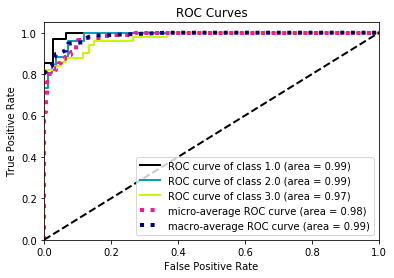

In [33]:
skplt.metrics.plot_roc(y_test, output)

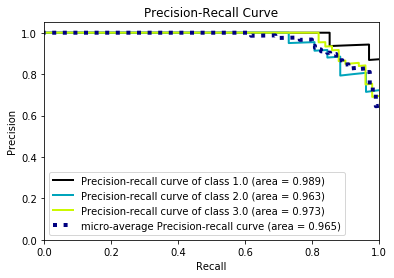

In [34]:
skplt.metrics.plot_precision_recall(y_test, output)

In [35]:
epoch = range(1, 51)

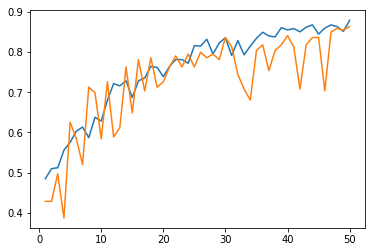

In [36]:
plt.plot(epoch, history.history['categorical_accuracy'])
plt.plot(epoch, history.history['val_categorical_accuracy'])
#plt.ylim([0,2])

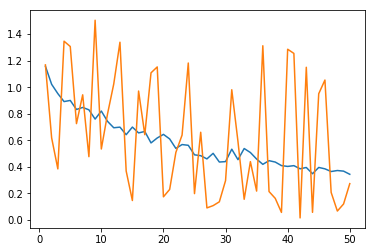

In [37]:
plt.plot(epoch, history.history['loss'])
plt.plot(epoch, history.history['val_loss'])
#plt.ylim([0,4])

In [38]:
labels_dict = {'V':1, 'NVT':2, 'NT': 3}

In [39]:
np.unique(y_test, return_counts = True)

(array([1., 2., 3.]), array([34, 26, 50]))

In [40]:
np.unique(y_train, return_counts = True)

(array([0., 1.]), array([1744,  872]))